# Caso de estudio 1:

Este código realiza la optimización del volumen de una caja mientras respeta las restricciones de superficie, utilizando un algoritmo genético que involucra selección, cruce, mutación y reemplazo elitista.

In [2]:
import numpy as np

## 1. **Generación de la Población Inicial**
La función `generar_poblacion(n, l)` crea una población inicial de cromosomas binarios, donde:
- `n` es el número de individuos en la población.
- `l` es la longitud de cada cromosoma (en este caso, 9 bits para representar las tres dimensiones de la caja).

In [29]:
def generar_poblacion(n, l=9):
    """Crea una población inicial de crmosomas binrarios.

    Args:
        n (int): número de individuos en la población,
        l (int): Longitud de cada cromosoma. Default l = 9

    Returns:
        np.array(): Matriz n x l
    """
    return np.random.randint(2, size=(n, l))

### Ejemplo 1.1.

Generar un número de población de 5 cromosomas con una longitud de 9 bits.

In [30]:
poblacion = generar_poblacion(5, 9)
print(poblacion)

[[0 0 0 0 0 0 1 1 0]
 [1 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 1 1]
 [0 0 1 0 0 1 1 1 1]]


### Ejemplo 1.2.

Generar un número de población de 8 cromosomas con una longitud de 24 bits.

In [31]:
poblacion = generar_poblacion(8, 24)
print(poblacion)

[[1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0]
 [0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0]
 [1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0]
 [1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0]
 [0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0]
 [0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0]]


## 2. **Decodificación de Cromosomas**
Cada cromosoma binario es decodificado en valores decimales que representan las dimensiones `l` (longitud), `w` (ancho), y `h` (altura) de la caja. La función `bin2dec` convierte un segmento binario en un valor decimal dentro de un rango definido, y `decodificar_cromosoma` aplica esta conversión a las tres dimensiones.

Fórmula de decodificación:

$$
x = L + \frac{\text{valor decimal}}{2^{n}-1} * (U - L)
$$

Donde:
$U$ es el valor superior del rango.

$L$ el valor inferior del rango.

$n$ el numero de bits (genes).


In [54]:
def bin2dec(cadena, _min, _max):
    """Convierte un segmento binario en un valor decimal dentro de un rango definido.

    Args:
        cadena (np.array): Cromosoma de n poblaciones.
        _min (int): Valor mínimo del rango.
        _max (int): Valor máximo del rango.

    Returns:
        _type_: _description_
    """
    longitud = len(cadena)
    valor_posicional = np.asarray([2**i for i in range(longitud)])[::-1]
    valor_decimal = cadena.dot(valor_posicional)
    max_binario = (2 ** longitud) - 1
    return _min + (valor_decimal / max_binario) * (_max - _min)

def decodificar_cromosoma(cromosoma, _min, _max):
    """Aplica la conversión don2dec a las tres dimensiones.

    Args:
        cromosoma (_type_): _description_
        _min (int): Valor mínimo del rango.
        _max (int): Valor máximo del rango.

    Returns:
        np.array: np.array([])
    """
    longitud = len(cromosoma) // 3
    l = bin2dec(cromosoma[:longitud], _min, _max)
    w = bin2dec(cromosoma[longitud:2*longitud], _min, _max)
    h = bin2dec(cromosoma[2*longitud:], _min, _max)
    return np.array([l, w, h])


### Ejemplo 2.1.

Relizar la decodificación de el primer cromosoma de la variable **problación**. Cuyo ranfo es de 1 a 5.

In [58]:
decodificar_cromosoma(poblacion[0],1,5)

array([3.76078431, 1.53333333, 2.75686275])

### Ejemplo 2.2.

Relizar la decodificación del segundo cromosoma de la variable **problación**. Cuyo rango es de 4 a 9.

In [53]:
decodificar_cromosoma(poblacion[1],4,9)

array([4.92156863, 8.05882353, 4.31372549])

## 3. **Función de Aptitud**
La aptitud de un cromosoma se calcula como el volumen de la caja, pero con una penalización si el área superficial excede un límite (20 en este caso).

In [55]:
def funcion_aptitud(l, w, h):
    """Función de aptitud

    Args:
        l, w y h se obtienen de la función decodificador_cromosoma

    Returns:
        _type_: _description_
    """
    volumen = l * w * h
    area = 2 * (l * w + l * h + w * h)
    if area > 20:
        return 0  # Penalización si no se cumple la restricción
    return volumen


### Ejemplo 3.1.

Calcular la función de aptitud del ejemplo 2.2.

In [62]:
funcion_aptitud(decodificar_cromosoma(poblacion[1],4,9)[0],
                decodificar_cromosoma(poblacion[1],4,9)[1],
                decodificar_cromosoma(poblacion[1],4,9)[2])

0

O se puede interpretar de ña siguente manera:

In [73]:
funcion_aptitud(*decodificar_cromosoma(poblacion[1],4,9))

0

## 4. **Selección por Torneo**
La función `seleccion_torneo` selecciona a un individuo para la reproducción mediante un proceso de torneo. Se elige un subconjunto aleatorio de la población y se selecciona el individuo con la mayor aptitud.

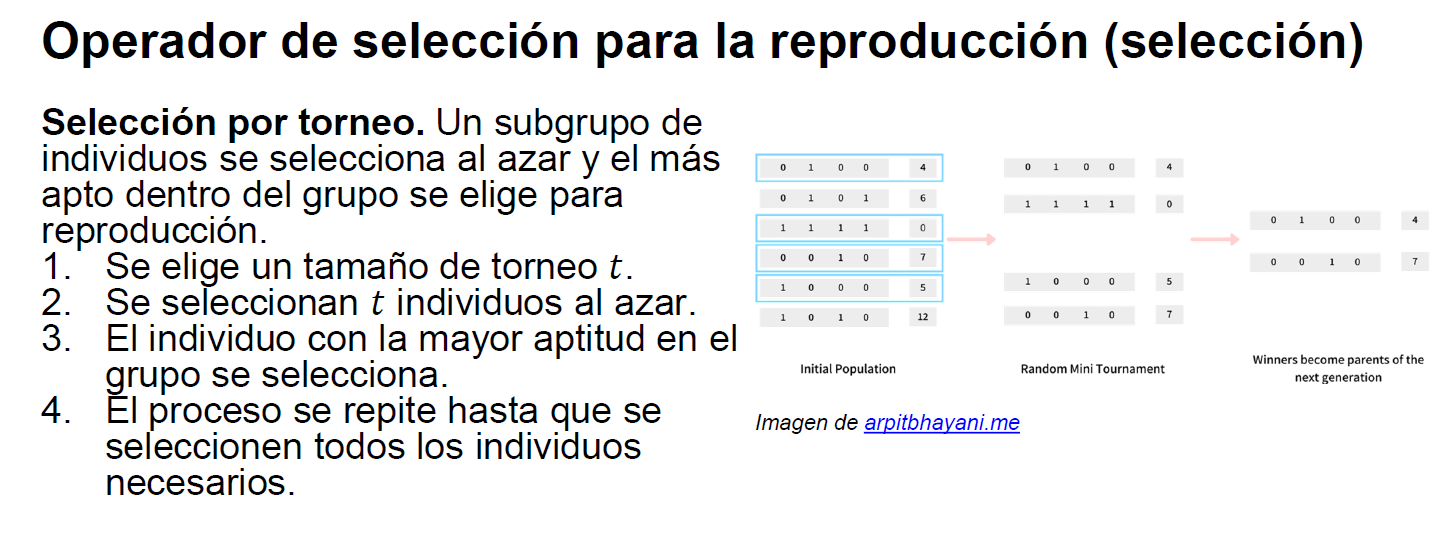

In [78]:
def seleccion_torneo(poblacion, k=2):
    """Selecciona a un individuo para la repoducción mediante un proceso de torneo. Se elige un
       subconjunto aleatorio de la población y se selecciona el individuo con la mayor aptitud.

    Args:
        poblacion (np.array(n*m)): Población
        k (int): Tamaño del torneo. Defualt: 2.

    Returns:
        _type_: _description_
    """
    N = len(poblacion)
    idx_torneo = np.random.choice(N, k)
    torneo = poblacion[idx_torneo]
    aptitudes = np.array([funcion_aptitud(*decodificar_cromosoma(ind, 0, 5)) for ind in torneo])
    ganador = torneo[np.argmax(aptitudes)]
    return ganador

### Ejemplo 4.1.

Elabora un selección por torneo de tamaño 5.

In [79]:
seleccion_torneo(poblacion,5)

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1])

## 5. **Cruce y Mutación**
En este paso, se combinan dos cromosomas padres para generar dos hijos. Luego, se aplica una mutación aleatoria que invierte un bit seleccionado al azar en el cromosoma.

In [82]:
def cruce(padre1, padre2):
    """Fusiona información de dos genotipos parentales en uno o dos genotipos descendientes.

    Args:
        padre1 (float): Genotipo del padre 1.
        padre2 (float): Genotipo del padre 2.

    Returns:
        tuple: (hijo1, hijo2)
    """
    punto_cruce = np.random.randint(1, len(padre1) - 1)
    hijo1 = np.concatenate((padre1[:punto_cruce], padre2[punto_cruce:]))
    hijo2 = np.concatenate((padre2[:punto_cruce], padre1[punto_cruce:]))
    return hijo1, hijo2

def mutacion_un_bit(individuo):
    """Se aplica a un genotipo y entraga un mutante.

    Args:
        individuo (numpy): Cromosoma del individuo a cambiar,

    Returns:
        numpy.array: numpy.array(mutacion_individuo)
    """
    bit_a_mutar = np.random.randint(len(individuo))
    individuo[bit_a_mutar] = 1 - individuo[bit_a_mutar]
    return individuo


### Ejemplo 5.6
Seleccionar dos padres a tavés del operador de selección tipo torneo de tamaño 6 y obtener a sus hijos.

In [92]:
padre1 = seleccion_torneo(poblacion,6)
padre2 = seleccion_torneo(poblacion,6)

cruce(padre1,padre2)

print(f"Hijo 1: {cruce(padre1,padre2)[0]}\n")
print(f"Hijo 2: {cruce(padre1,padre2)[1]}")


Hijo 1: [1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0]

Hijo 2: [1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0]


### Ejemplo 5.7

Mutar al hijo 2 y compararla antes de la mutación.

In [94]:
hijo2 = cruce(padre1,padre2)[1]

print(f"Hijo 2 antes de la mutación: {hijo2}\n")
print(f"Hijo 2 siendo un X-men: {mutacion_un_bit(hijo2)}")

Hijo 2 antes de la mutación: [1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0]

Hijo 2 siendo un X-men: [1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0]


## 6. **Reemplazo Elitista**
El reemplazo elitista asegura que los mejores individuos de la población actual se preserven para la siguiente generación.

In [23]:
def reemplazo_elitista(poblacion, nueva_poblacion, num_elites):
    """El reemplazo elitista asegura que los 
       mejores individuos de la población actual se preserven para la siguiente generación.

    Args:
        poblacion (np.array(n*m)): Población
        poblacion (np.array(n*m)): Nueva población
        num_elites (int): tamaño del grupo élite.

    Returns:
        _type_: _description_
    """
    poblacion_ordenada = sorted(poblacion, key=lambda ind: funcion_aptitud(*decodificar_cromosoma(ind, 0, 5)), reverse=True)
    nueva_poblacion_ordenada = sorted(nueva_poblacion, key=lambda ind: funcion_aptitud(*decodificar_cromosoma(ind, 0, 5)), reverse=True)
    elitistas = poblacion_ordenada[:num_elites]
    nueva_poblacion_reemplazada = elitistas + nueva_poblacion_ordenada[:len(poblacion) - num_elites]
    return np.array(nueva_poblacion_reemplazada)

## 7. **Ejecución del Algoritmo Genético**
Finalmente, el algoritmo genético se ejecuta iterativamente, creando nuevas generaciones de cromosomas hasta que se alcanza el número deseado de generaciones.

In [24]:
def algoritmo_genetico(poblacion_inicial, generaciones, k, num_elites):
    poblacion = poblacion_inicial
    historial = []
    for _ in range(generaciones):
        nueva_poblacion = []
        while len(nueva_poblacion) < len(poblacion):
            padre1 = seleccion_torneo(poblacion, k)
            padre2 = seleccion_torneo(poblacion, k)
            hijo1, hijo2 = cruce(padre1, padre2)
            nueva_poblacion.append(mutacion_un_bit(hijo1))
            nueva_poblacion.append(mutacion_un_bit(hijo2))

        # Aplicar reemplazo elitista
        poblacion = reemplazo_elitista(poblacion, nueva_poblacion, num_elites)

    return max(poblacion, key=lambda ind: funcion_aptitud(*decodificar_cromosoma(ind, 0, 5)))




### Ejecución y Resultados
El script principal ejecuta el algoritmo genético con los parámetros definidos y muestra el mejor cromosoma encontrado, junto con sus dimensiones y su aptitud (volumen).


In [26]:
if __name__ == "__main__":
    n = 2  # Tamaño de la población
    l = 24  # Longitud de cada cromosoma
    generaciones = 100
    k = 2  # Tamaño del torneo
    num_elites = 10  # Número de individuos a preservar

    # Generar población inicial
    poblacion_inicial = generar_poblacion(n, l)

    # Ejecutar algoritmo genético
    mejor_cromosoma = algoritmo_genetico(poblacion_inicial, generaciones, k, num_elites)
    l, w, h = decodificar_cromosoma(mejor_cromosoma, 0, 5)
    print("Mejor solución encontrada:")
    print("Cromosoma:", mejor_cromosoma)
    print("Dimensiones (l, w, h):", [l, w, h])
    print("Aptitud (volumen):", funcion_aptitud(l, w, h))

Mejor solución encontrada:
Cromosoma: [0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0]
Dimensiones (l, w, h): [1.4705882352941178, 2.4901960784313726, 1.1372549019607843]
Aptitud (volumen): 4.164687789764118
